In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/weather_data.csv', parse_dates=True)
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df = df.set_index('Date')
print('Shape of data',df.shape)
df.head()

Shape of data (11883, 1)


,Temperature
Date,
1990-01-01,23.2
1990-01-02,22.2
1990-01-03,21.8
1990-01-04,25.4
1990-01-05,26.5


In [3]:
print('Max Temperature:', df['Temperature'].max())
print('Min Temperature:', df['Temperature'].min())
print('Mean Temperature:', round(df['Temperature'].mean(), 2))
print('Median Temperature:', df['Temperature'].median())
print('Standard Deviation of Temperature:', round(df['Temperature'].std(), 2))

Max Temperature: 33.7
Min Temperature: 17.7
Mean Temperature: 27.76
Median Temperature: 28.1
Standard Deviation of Temperature: 2.19


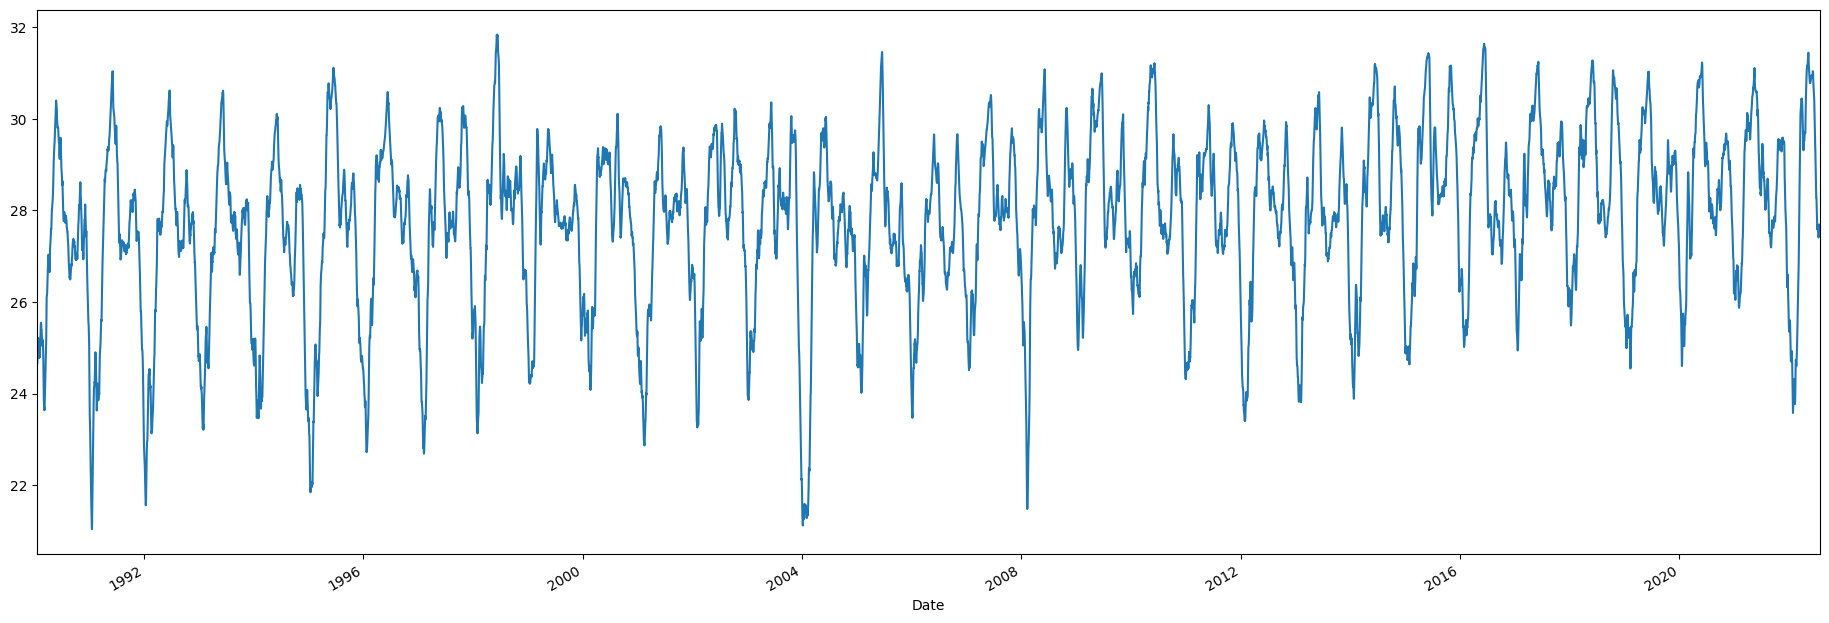

In [4]:
df['Temperature'].rolling(20).mean().plot(figsize=(23,8)).autoscale(axis='x',tight=True)

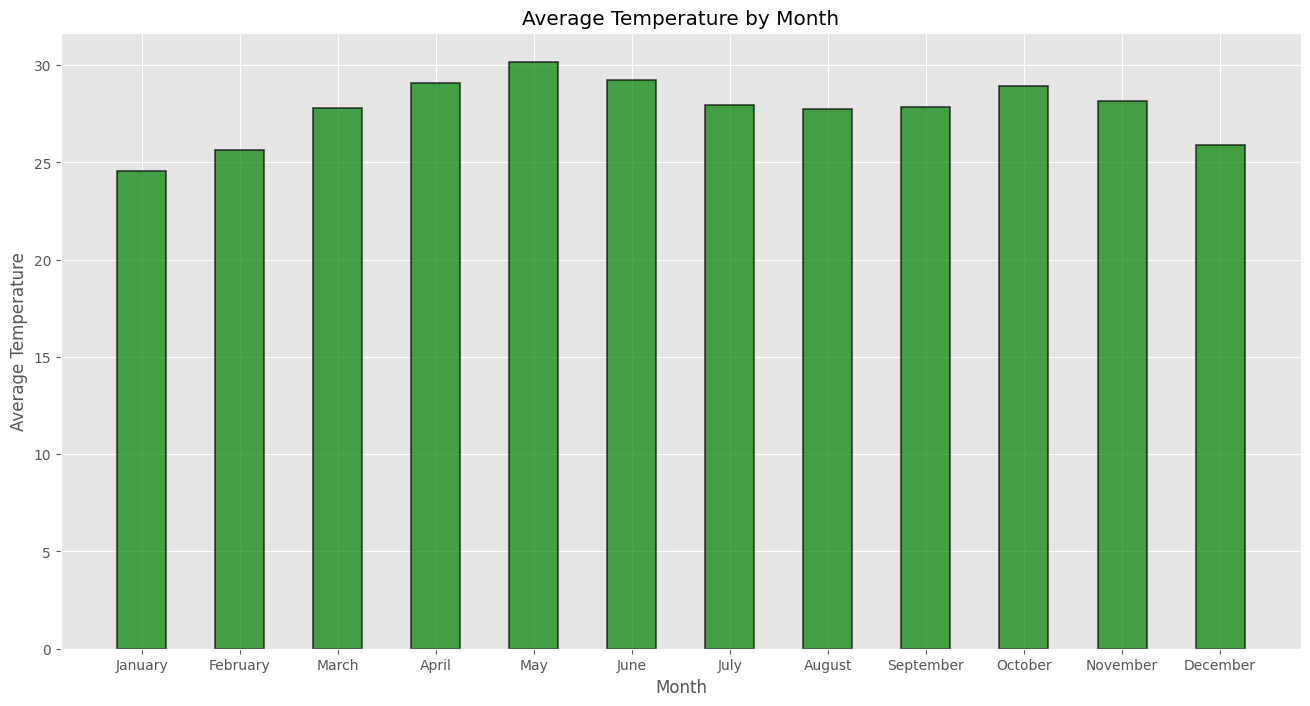

In [9]:
df['Month'] = df.index.month
df['Year'] = df.index.year

monthly_avg_temp = df.groupby(['Month'])['Temperature'].mean()

combined_avg_temp_list = []

for month in range(1, 13):
    combined_avg_temp = df[df['Month'] == month]['Temperature'].mean()
    combined_avg_temp_list.append(combined_avg_temp)

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(16, 8))
plt.bar(month_names, combined_avg_temp_list, color='green', width=0.5, edgecolor='black',  linewidth=1.2, align='center', alpha=0.7, label='Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Month')
plt.show()

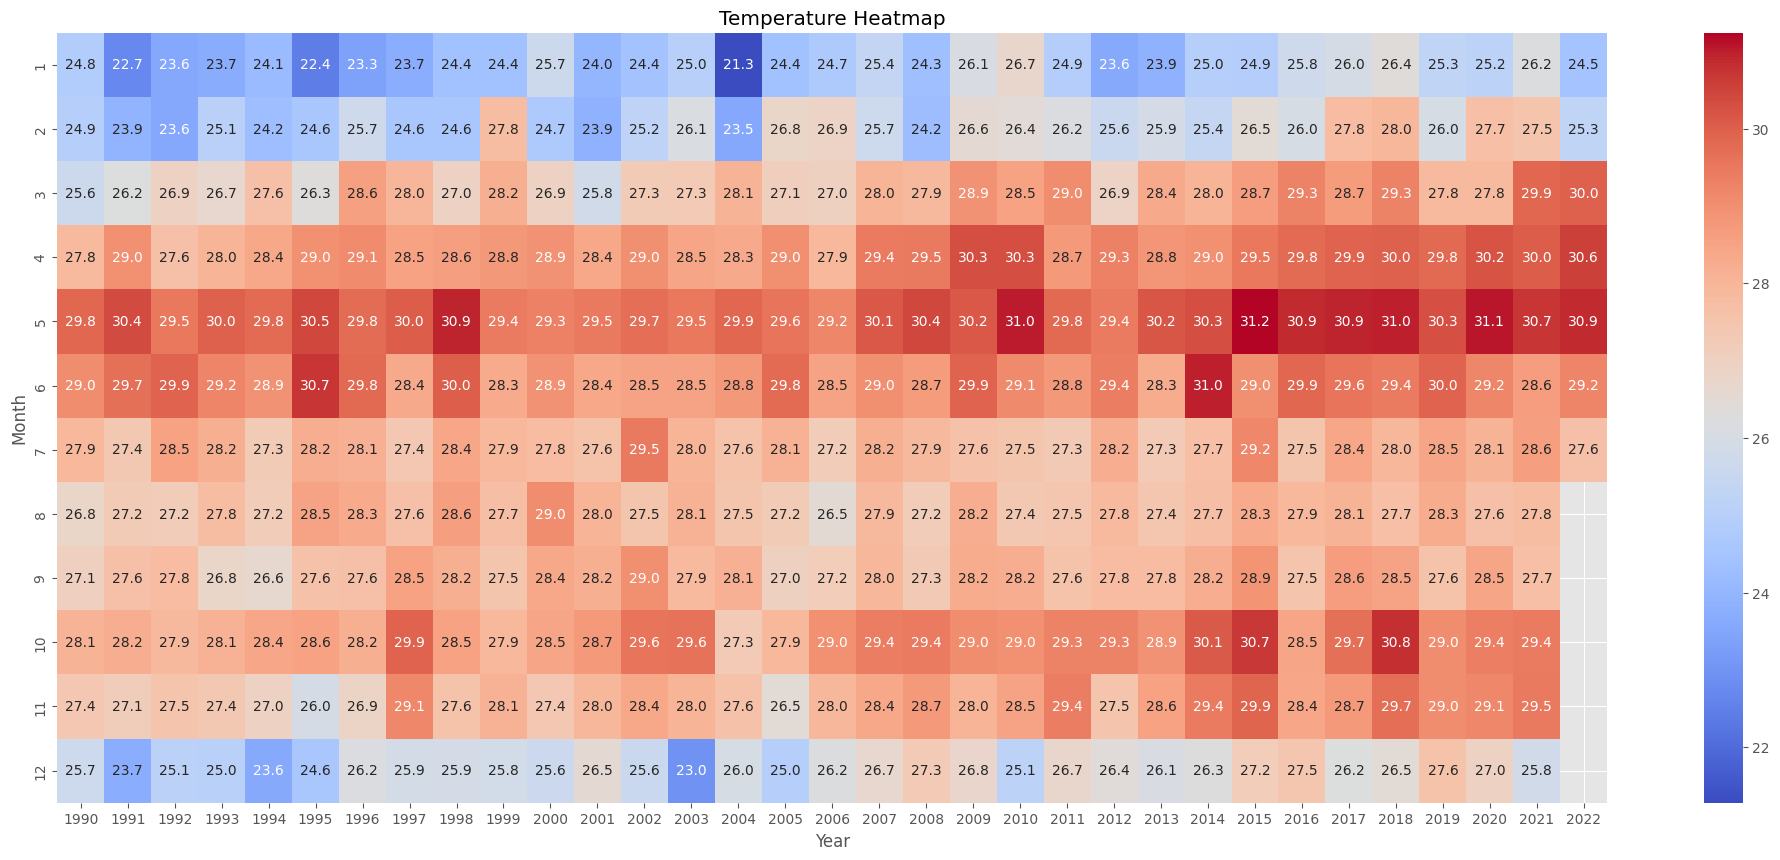

In [10]:
import seaborn as sns

pivot_table = df.pivot_table(values='Temperature', index='Month', columns='Year', aggfunc='mean')

plt.figure(figsize=(25, 10))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", cbar=True)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Temperature Heatmap')
plt.show()

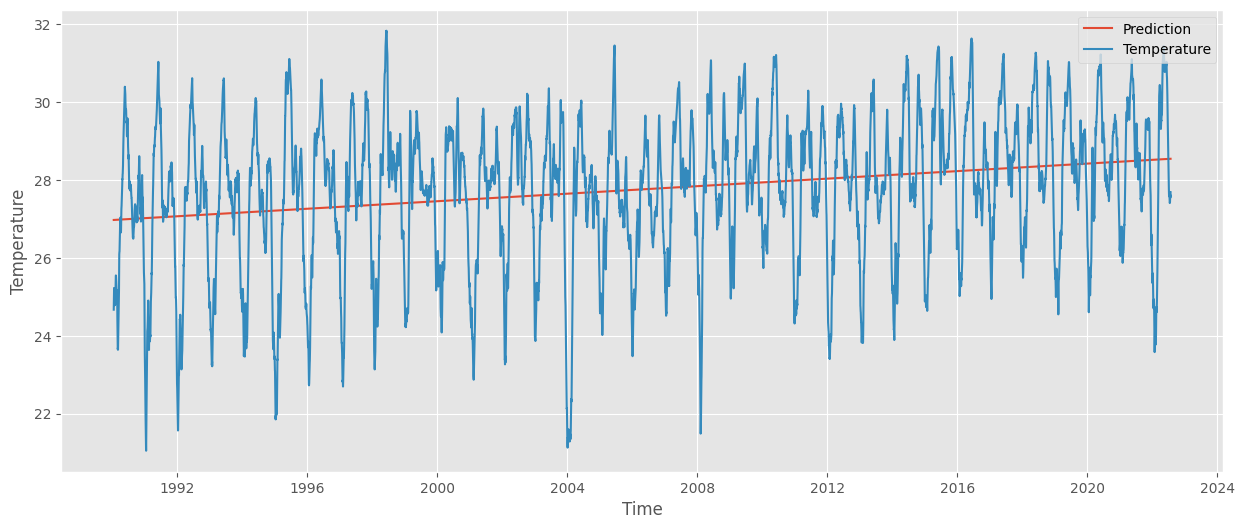

In [7]:
from sklearn.linear_model import LinearRegression

df['Time'] = np.arange(len(df.index))
X = df.loc[:, ['Time']]
y = df.loc[:, 'Temperature']

lin_model = LinearRegression()
lin_model.fit(X, y)

df['Prediction'] = pd.Series(lin_model.predict(X), index=X.index)

plt.style.use('ggplot')
plt.figure(figsize=(15, 6))
    
plt.plot(df['Prediction'].rolling(20).mean(), label = 'Prediction')
plt.plot(df['Temperature'].rolling(20).mean(), label = 'Temperature')
plt.legend(loc="upper right")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Temperature'], autolag = 'AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -10.749707701229982
2. P-Value :  2.6847967990919543e-19
3. Num Of Lags :  39
4. Num Of Observations Used For ADF Regression: 11843
5. Critical Values :
	 1% :  -3.4309022855647804
	 5% :  -2.861784081549966
	 10% :  -2.566899919546274


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Temperature'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30714.274, Time=8.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=31713.694, Time=0.74 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31709.042, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31705.937, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=31711.697, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=30720.772, Time=3.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=30712.403, Time=3.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=31422.523, Time=0.75 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=30714.261, Time=5.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=31207.370, Time=1.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=30715.986, Time=4.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=30710.415, Time=0.93 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=1.95 sec
 ARIMA(2,1,0)(0,0,0)[0]        

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Temperature'], order=stepwise_fit.get_params()['order'])
model = model.fit()
model.summary()

c:\Users\itssp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\itssp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\itssp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Temperature   No. Observations:                11883
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -15351.208
Date:                Sat, 29 Apr 2023   AIC                          30710.415
Time:                        11:54:04   BIC                          30739.946
Sample:                             0   HQIC                         30720.326
                              - 11883                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7714      0.011     72.062      0.000       0.750       0.792
ar.L2         -0.1384      0.008    -16.680      0.000      -0.155      -0.122
ma.L1         -0.8689      0.008   -107.976      0.000      -0.885      -0.853
sigma2         0.7757      0.007    111.566      0.000       0.762       0.789
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2530.30
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

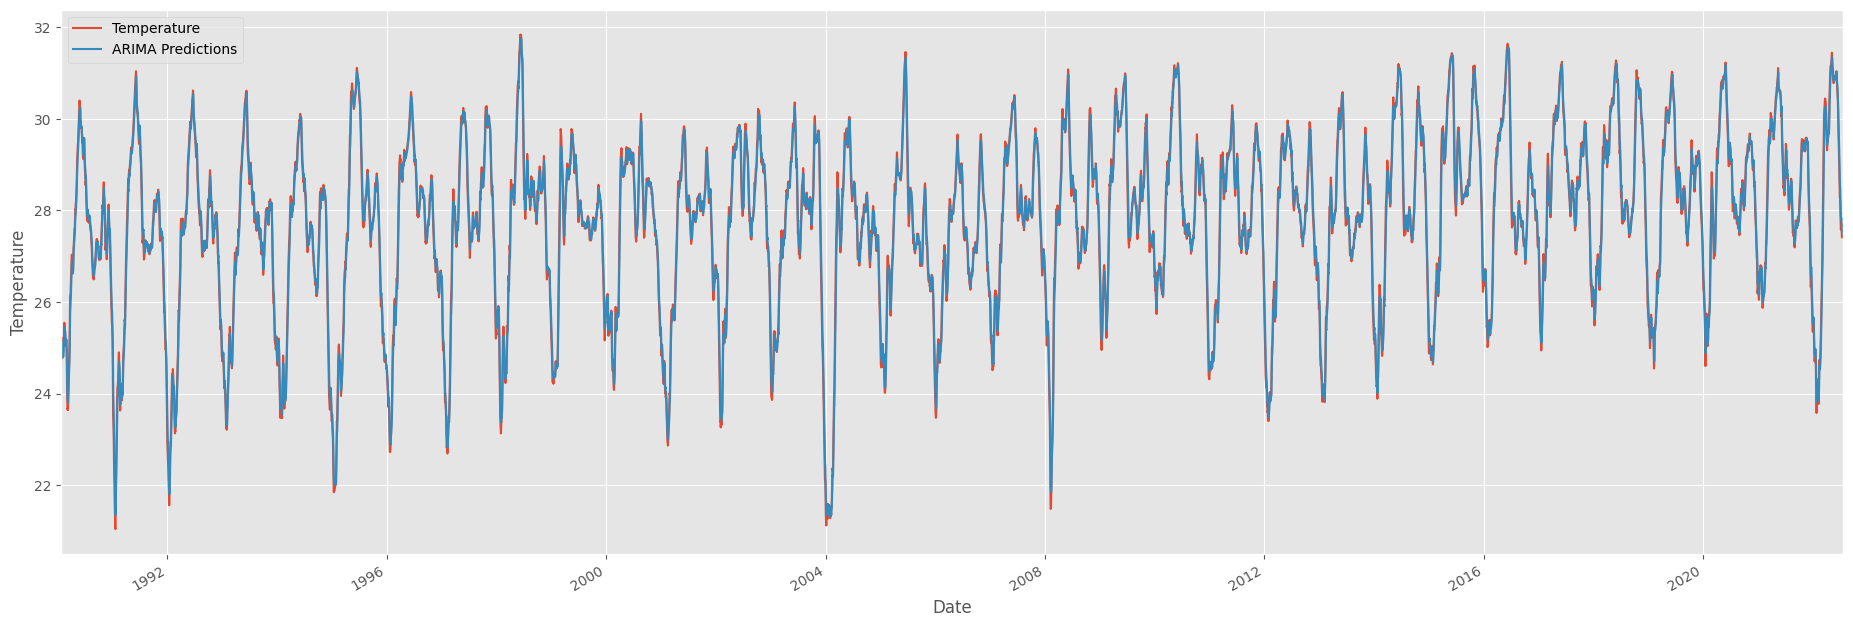

In [ ]:
pred = model.predict(start=1,end=len(df)-1,typ='levels').rename('ARIMA Predictions')
actual = df[1:len(df)]

plt.ylabel('Temperature')

actual['Temperature'].rolling(20).mean().plot(legend=True).autoscale(axis='x',tight=True)
pred.rolling(20).mean().plot(legend=True, figsize=(23,8)).autoscale(axis='x',tight=True)

Text(0.5, 1.0, 'Actual vs Predicted Temperature (RMSE: 0.88)')

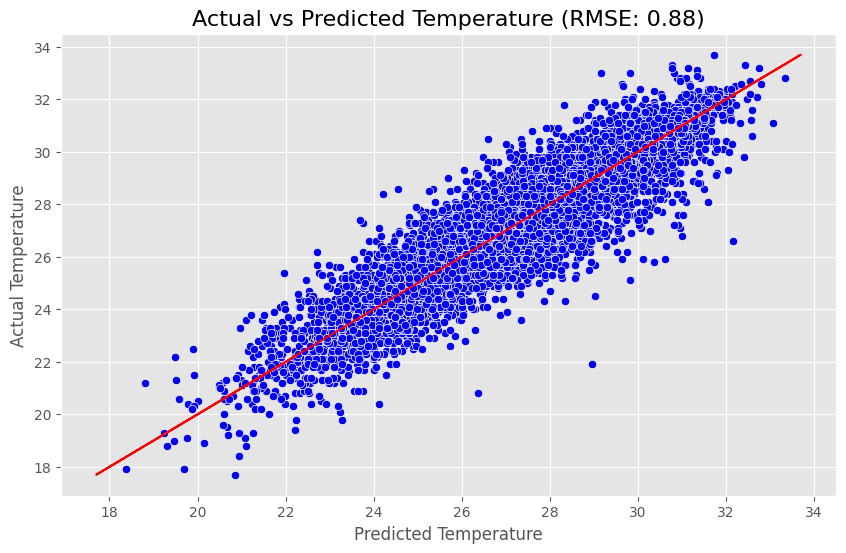

In [ ]:
from sklearn.metrics import mean_squared_error

# Plot Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pred, y=actual['Temperature'], color='blue')

# Plot perfect prediction line
plt.plot(actual['Temperature'], actual['Temperature'], color='red')

# Label axes
plt.xlabel('Predicted Temperature')
plt.ylabel('Actual Temperature')

# Calculate and show Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual['Temperature'], pred))
plt.title(f"Actual vs Predicted Temperature (RMSE: {round(rmse, 2)})", size=16)

# Temperature prediction in Mumbai Today

In [ ]:
model.predict(start=12160, end=12160)

c:\Users\itssp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


12160    27.966875
dtype: float64

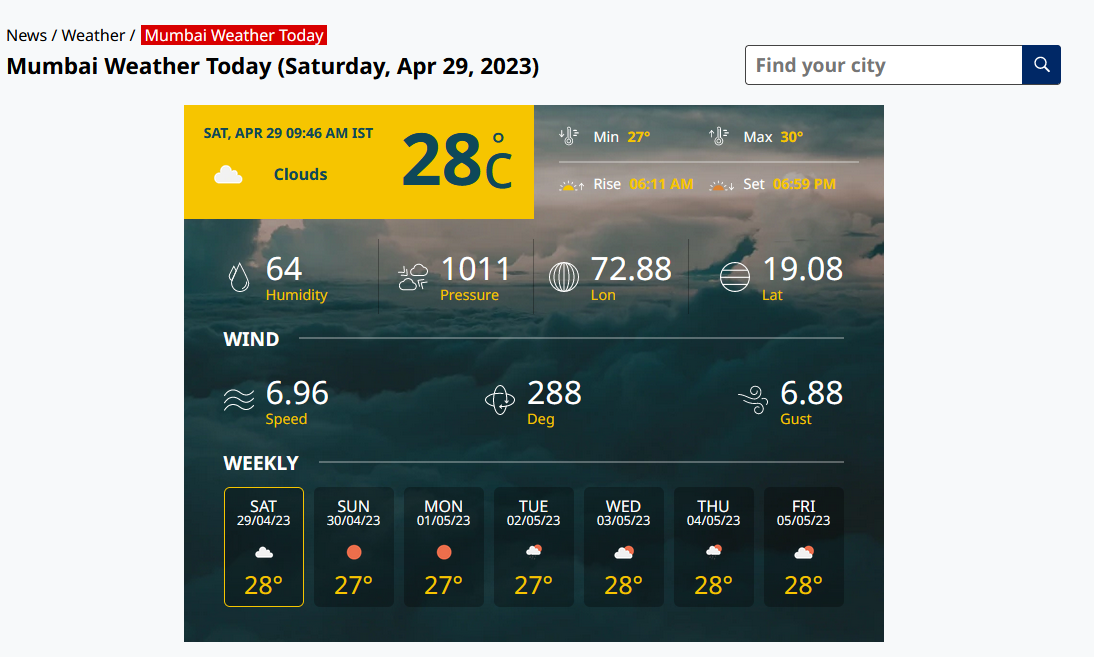